In [1]:
%matplotlib inline

# Computational Graphs (Basics)

## What is a computational graph?

Computational graph is a graphical representation of numerical computations. The mathematical operations are captured as nodes. The data flowing as input and output of the nodes is represented by the edges connecting them. 

## Why computational graphs?

Computational graphs provide a way to *define* the computations that need to be done. They are like a visual programming language (declarative language). Once the computation is described, the libraries like Tensorflow and Theano, can execute them depending on the device configurations where the computation is executed. Thus once defined the computation can be run on CPUs, a distributed network of CPUs, GPUs, mobile phones etc.

## Computational graph in Tensorflow

In Tensorflow, you can use Python language to programmatically build a computational graph. Inputs for the graph are defined as placeholders and they are supplied at the time of executing the computations. To compute on the graph, a Tensorflow session is created and input data is provided. If you execute the run and provide the nodes whose values you seek as output. Tensorflow finds all *dependent* computation nodes necessary to compute the values of output nodes, and executes the computation only for the necessary paths. 

We will see in later sessions how more advanced computing is done in the context of neural networks, and also understand how Tensorflow computational graph provides automatic differentiation, necessary for learning algorithms like backpropagation.

In [2]:
from graphviz import Digraph
from IPython.core.display import display, SVG

def tf_to_dot(graph):
    dot = Digraph()

    for n in graph.as_graph_def().node:
        name = n.name.split('/')[0]
        dot.node(name, label=name)

        for src in n.input:
            src = src.split('/')[0]
            if src != name:
                dot.edge(src, name)
    display(SVG(dot._repr_svg_()))        
    return dot

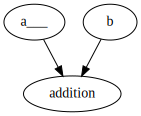

16.0


In [3]:
import tensorflow as tf

tf.reset_default_graph()

node_a = tf.placeholder(dtype=tf.float32,name="a___")
node_b = tf.constant(6.0,dtype=tf.float32, name="b")

adder_node = tf.add(node_a,node_b, name="addition")


sess = tf.Session()
output = sess.run(adder_node,{node_a:10.0})
tf_to_dot(tf.get_default_graph())
sess.close()

print output

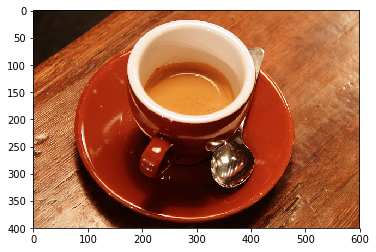

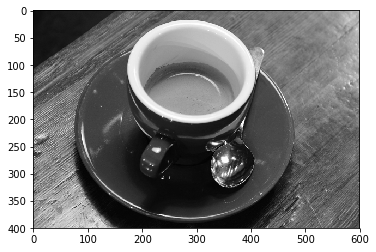

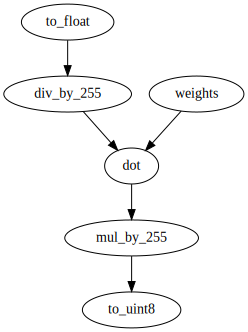

In [8]:
from skimage import data as imgdata
import skimage.color as color
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import numpy as np

coffee_cup = imgdata.coffee()
plt.imshow(coffee_cup)
plt.show()

def to_gray(img):
    #img = tf.placeholder(tf.uint8,name="input____")
    img_float = tf.div(tf.cast(img,dtype=tf.float64,name="to_float"),255.0,name='div_by_255')
    weights = tf.constant([0.2125,0.7154,0.0721],dtype=tf.float64,name="weights")
    
#     R = tf.slice(img_float,[0,0,0],[-1,-1,1],name='extract_red')
#     G = tf.slice(img_float,[0,0,1],[-1,-1,1],name='extract_green')
#     B = tf.slice(img_float,[0,0,2],[-1,-1,1],name='extract_blue')
    
    
#     gray = 0.2125*R + 0.7154*G + 0.0721*B
    gray = tf.tensordot(img_float,weights,axes=1,name="dot")
#     weighted = tf.multiply(img_float,weights,name="weighting")
#     gray = tf.reduce_sum(weighted,axis=2, name ="weighted_sum") 
    
    output = tf.cast(tf.multiply(gray,255.0,name='mul_by_255'), tf.uint8, name="to_uint8")
    return output

tf.reset_default_graph()
gray_graph = to_gray(coffee_cup)
#gray_graph = to_gray(coffee_cup)

I = np.uint8(color.rgb2gray(coffee_cup)*255)

with tf.Session() as sess:
    gray_image = np.squeeze(sess.run(gray_graph))
#     print gray_image.shape
#     print I.shape
#     print np.max(gray_image),np.min(gray_image),np.mean(gray_image)
#     print np.max(I),np.min(I),np.mean(I)
#     print np.max(np.abs(gray_image-I))
    plt.imshow(np.squeeze(gray_image),'gray')
    plt.show()
dot=tf_to_dot(tf.get_default_graph())



    

In [3]:
%matplotlib inline
import tensorflow as tf
import skimage.data as imgdata
import matplotlib.pyplot as plt
import numpy as np

horse = imgdata.horse().astype(np.uint8)

def horse_color(img):
#     horse_idx = tf.constant(img.)
    horse = tf.constant(img.astype(bool),name='horse')
#     white = tf.constant(np.ones((img.shape[0],img.shape[1],3),dtype=np.float64)*255)
#     color = tf.constant(np.full((img.shape[0],img.shape[1],3),np.array([127.0,255.0,128.0]),dtype=np.float64))
#     white = tf.constant(np.zeros(img.shape,dtype=np.uint8))
#     color = tf.constant(np.ones(img.shape,dtype=np.uint8)*128)
    horse_idx = tf.where(horse)
#     colored_horse = tf.boolean_mask(color,horse)
#     zero = tf.constant(0, dtype=tf.uint8)
#     non_empty = tf.not_equal(horse, zero,name='horse_nonempty')
#     unit8_nonempty_horse = tf.cast(tf.not_equal(horse, zero,name='horse_nonempty'),dtype=tf.uint8,name="to_uint8")
    return horse_idx

tf.reset_default_graph()
horse_data =  imgdata.horse()
horse_graph = horse_color(horse_data)

with tf.Session() as sess:
    horse_image = sess.run(horse_graph)
    print horse_image,horse_data
#     plt.imshow(horse_image)
#     plt.show()
# dot=tf_to_dot(tf.get_default_graph())


[[  0   0]
 [  0   1]
 [  0   2]
 ..., 
 [327 397]
 [327 398]
 [327 399]] [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
